# **Predicting Term Deposit Subscriptions Using Bank Marketing Data**

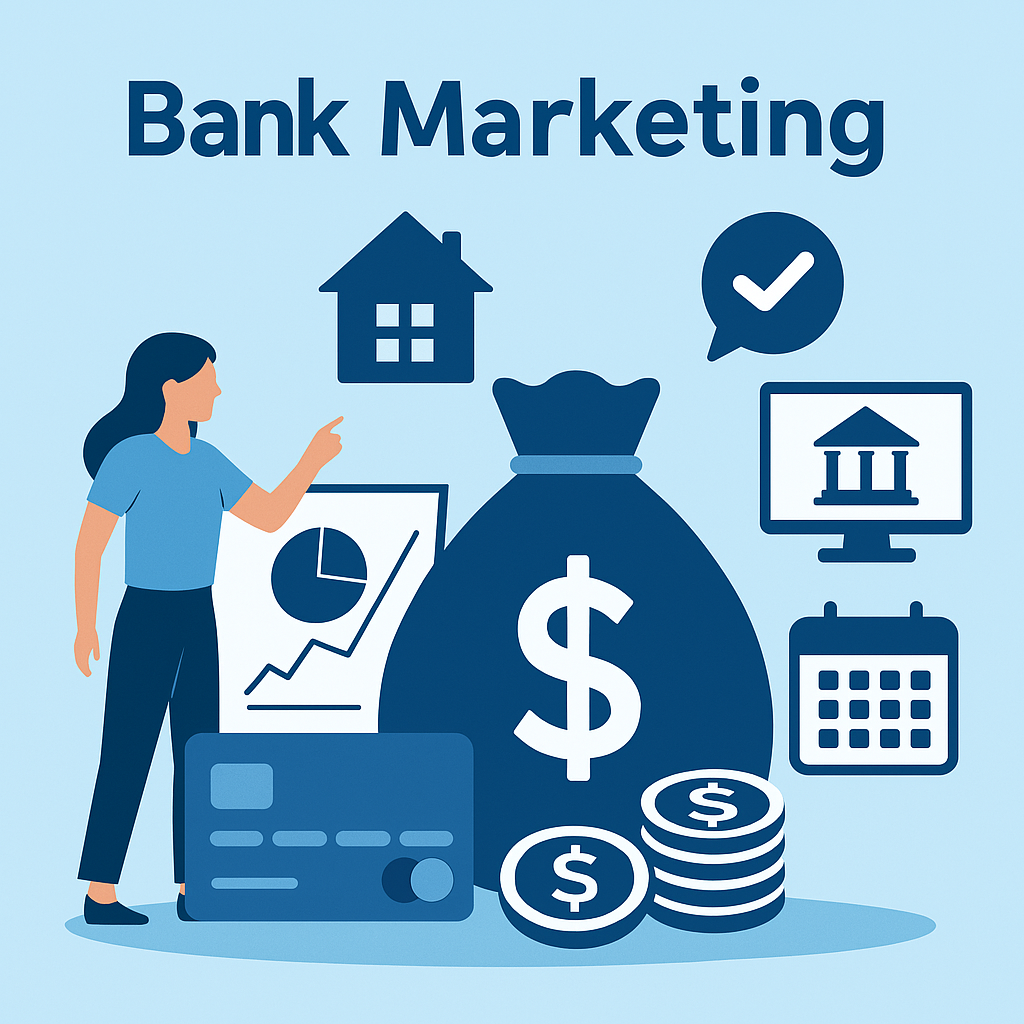

In [4]:
Image(filename='bmpi.png')

# Table of Contents :

1. Introduction
2. Goal Of the Project
3. Data Story
4. Data Preprocessing
5. Model Training & Evaluation
6. Model Optimization
7. Pipeline

# **1. Introduction**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

# **2. Goal of the Project**

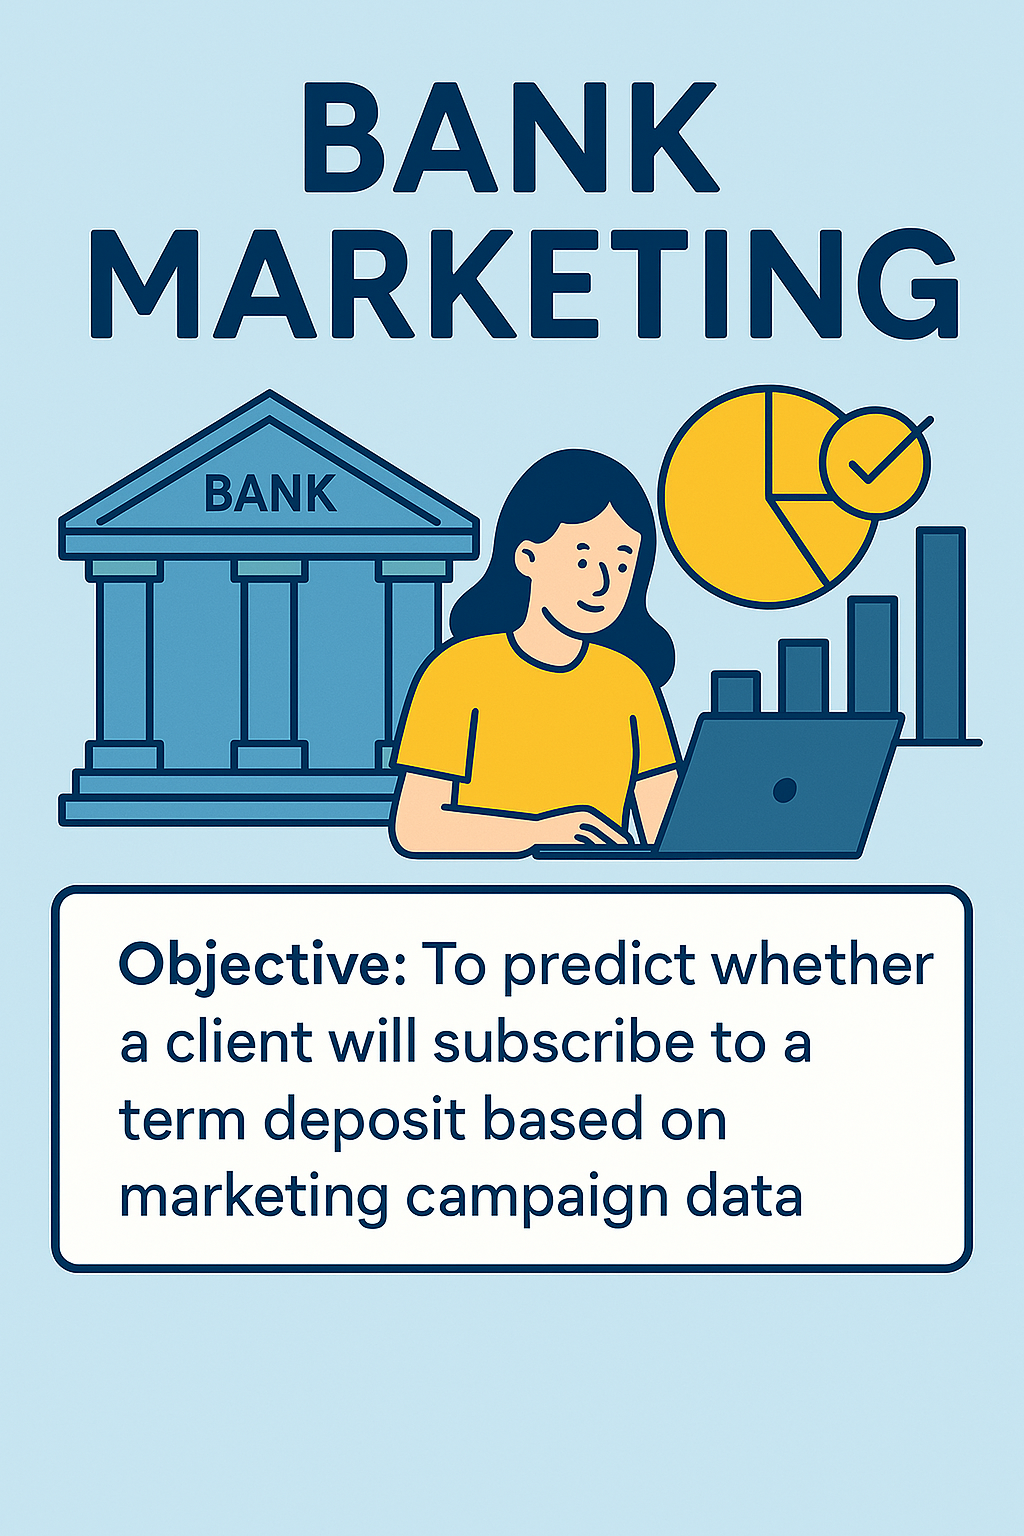

In [9]:
Image(filename='bmpi2.png', width=500)

# **3. Data Story/Source**

About dataset

Source of the data is from   UC Irvine Machine Learning Repository.

Link : https://archive.ics.uci.edu/dataset/222/bank+marketing



**Dataset Description**

 Bank-additional-full.csv consists of 20 columns & 41188 rows

# **Features/columns:**
The dataset contains client and campaign-related features such as age, job type, marital status, account balance, and contact details. It aims to predict whether a client will subscribe to a term deposit (y).

**TOOLS USED**

*Libraries*:

    import sklearn: Imports the scikit-learn library, commonly used for machine learning.

    import pandas as pd: Imports pandas for data manipulation and analysis.
    
    import numpy as np: Imports NumPy for numerical computing.
    
    import matplotlib.pyplot as plt: Imports Matplotlib for plotting graphs and visualizations.
    
    import seaborn as sns: Imports Seaborn for statistical data visualization.
    
    from IPython.display import Image: Imports functionality to display images in Jupyter Notebooks.
    
    from sklearn.model_selection import train_test_split, cross_val_score: Imports tools for splitting data and cross-validation.
    
    from sklearn.feature_selection import RFE: Imports Recursive Feature Elimination for feature selection.
    
    from imblearn.over_sampling import SMOTE: Imports SMOTE for handling imbalanced datasets by oversampling.
    
    from sklearn.preprocessing import LabelEncoder: Imports LabelEncoder for converting categorical labels to numerical values.
    
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc: Imports various metrics for evaluating model performance.

    from sklearn.tree import DecisionTreeClassifier: Imports the DecisionTreeClassifier for building decision tree models.
    
    from xgboost import XGBClassifier: Imports XGBClassifier for gradient boosting with XGBoost.
    
    from lightgbm import LGBMClassifier: Imports LGBMClassifier for LightGBM gradient boosting.
    
    from sklearn.ensemble import RandomForestClassifier: Imports RandomForestClassifier for building random forest models.
    
    from sklearn.ensemble import GradientBoostingClassifier: Imports GradientBoostingClassifier for gradient boosting models.
    
    from imblearn.pipeline import Pipeline: Imports Pipeline from imbalanced-learn for building machine learning pipelines.
    
    from sklearn.compose import ColumnTransformer: Imports ColumnTransformer for applying different transformations to columns.
    
    from sklearn.model_selection import GridSearchCV: Imports GridSearchCV for hyperparameter tuning using cross-validation.
    
    import joblib: Imports joblib for saving and loading Python objects, typically models.


*Methods / Functions:*

    pd.read_csv() – Loads data from a CSV file.
    
    df.select_dtypes() – Selects columns based on data types.
    
    train_test_split() – Splits data into training and testing sets.
    
    drop() – Removes unwanted columns.
    
    sns.boxplot() / sns.countplot() / sns.heatmap() / sns.pairplot() – Various plots for EDA.
    
    Skewness – Measures the asymmetry of the distribution of data in a feature.

    Capping method – Limits extreme outlier values in a feature using statistical thresholds like IQR.
    
    Log transformation method – Applies logarithmic scaling to reduce skewness and stabilize variance in data.
    
    Label encoding – Converts categorical labels into numerical values for machine learning models.
    
    Correlation matrix – Displays the pairwise correlation between features to identify relationships.
    
    SMOTE – Synthesizes new samples of the minority class to balance imbalanced datasets.
    
    Feature Selection (RFE with Random Forest) – Iteratively removes less important features using a Random Forest estimator.
    
    Random Forest Classifier – An ensemble model that builds multiple decision trees and aggregates their predictions.
    
    XGBoost Classifier – An optimized gradient boosting algorithm known for speed and performance in structured data tasks.
    
    Light GBM Classifier – A high-performance, fast gradient boosting algorithm optimized for large datasets.
    
    Decision Tree Classifier – A model that splits data based on feature thresholds to classify outcomes.
    
    Gradient Boosting Classifier – Builds models sequentially to correct the errors of previous ones using boosting.
    
    Accuracy – Measures the percentage of correctly predicted instances out of all predictions.
    
    Precision – Represents the ratio of correctly predicted positive observations to total predicted positives.
    
    F1 Score – The harmonic mean of precision and recall, balancing both in a single metric.
    
    Recall – The ratio of correctly predicted positive cases to all actual positives.

    Cross Validation – A technique to assess model performance by splitting data into multiple train-test folds.
    
    ROC and AUC – ROC plots true positive rate vs. false positive rate; AUC quantifies the model’s classification ability.
    
    Pipeline – Chains preprocessing and modeling steps into a single object to streamline workflows.
    
    Hyperparameter tuning – Optimizes model settings to improve performance.

# **Data Preprocessing**

**I.Importing Libraries**

In [17]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [18]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import joblib

**II. Load the dataset**

In [20]:
file_path = "bank-additional-full.csv"
df = pd.read_csv("bank-additional-full.csv", sep=";")
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

**III.Understand the data structure**

In [22]:
df.head

<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mont

In [23]:
df.shape

(41188, 21)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [25]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [26]:
df.describe(include='object')

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

In [27]:
print(df['default'].value_counts(normalize=True))

default
no         0.791201
unknown    0.208726
yes        0.000073
Name: proportion, dtype: float64


In [28]:
# Dropping the unnecessary columns
df = df.drop(columns=['default', 'duration'])

Default tells you how many people said "yes", "no", or "unknown" for having a credit default. If almost all values are "no" or "unknown", then the column isn’t useful (low variance).
Duration is the duration of the call, which you only know after the outcome (y) happens. It gives high accuracy but makes the model unrealistic.

In [30]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

**IV.Handle Missing Data**

In [32]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


After checking the missing values in the dataframe, it shows there are no missing values.

**V.Handle Duplicates**

In [35]:
df.duplicated().sum()

1997

In [36]:
df.drop_duplicates(inplace=True)

**VI.Exploratory Data Analysis: Visualizing Insights with Diverse Graph Types**

*Box Plot for Visualizing the Distribution of Numeric Features*

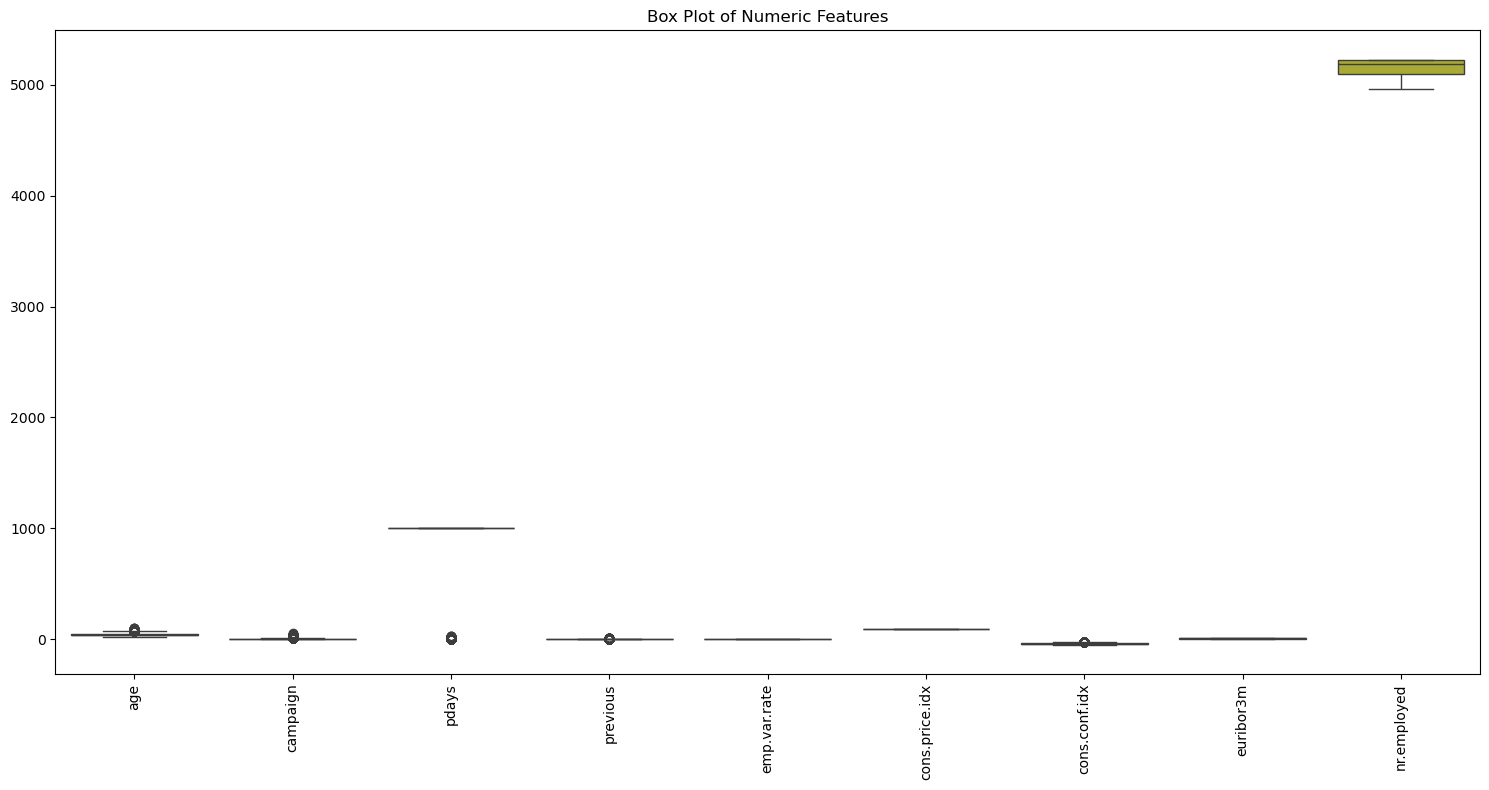

In [39]:
# Box Plot
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
sns.boxplot(df)
plt.title("Box Plot of Numeric Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Box plot displaying the distribution and potential outliers of numeric features in the dataset.

*Univariate Analysis*

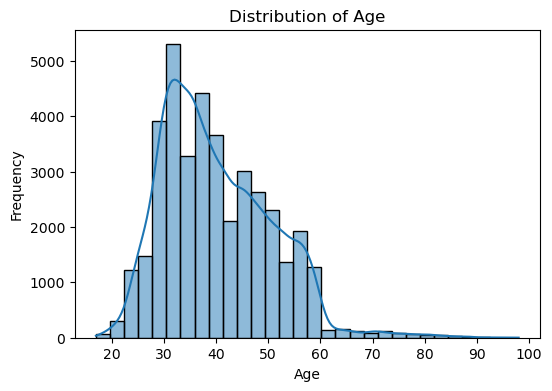

In [42]:
# Histogram of Age
plt.figure(figsize=(6,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Helps to see the distribution of customers by age.

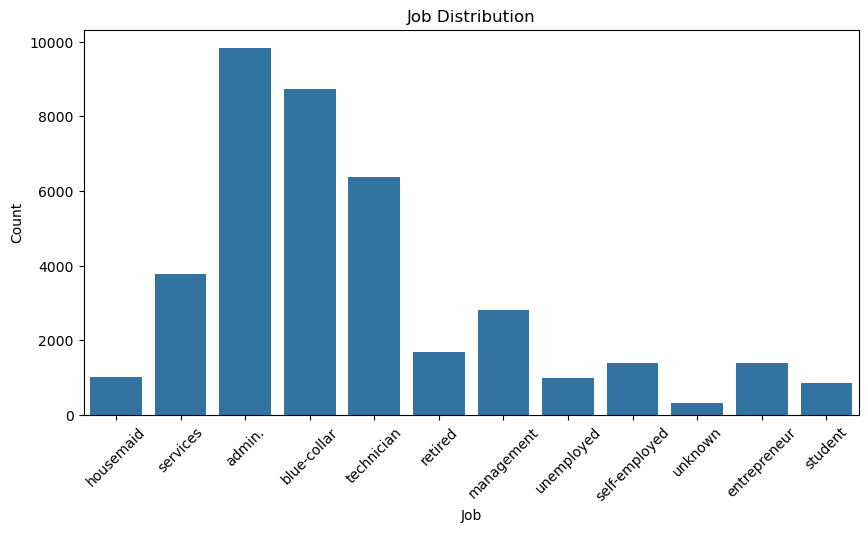

In [44]:
# Countplot of Job
plt.figure(figsize=(10,5))
sns.countplot(x='job', data=df)
plt.xticks(rotation=45)
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

Shows how many customers fall under each job category.

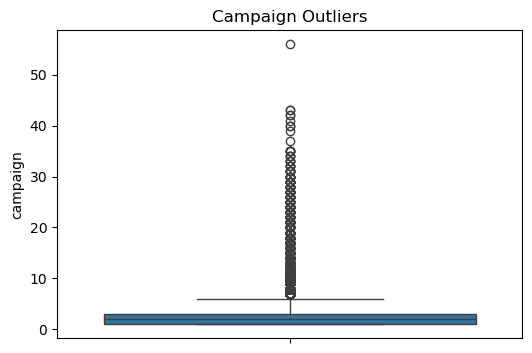

In [46]:
# Boxplot for Campaign
plt.figure(figsize=(6,4))
sns.boxplot(y='campaign', data=df)
plt.title('Campaign Outliers')
plt.show()

Identifies outliers in the number of contacts performed during the campaign.

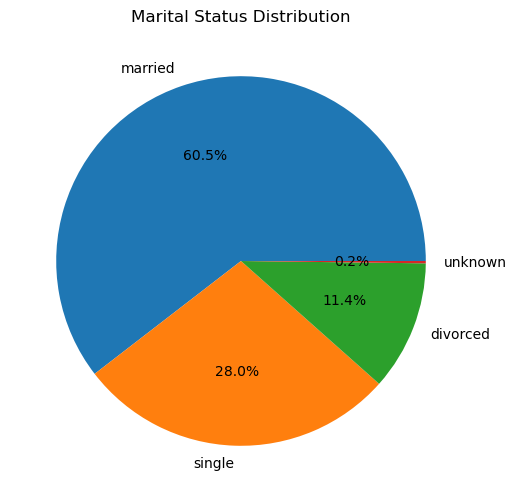

In [48]:
# Pie Chart for Marital Status
df['marital'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()

Shows proportion of customers in each marital status group.

*Bivariate Analysis*

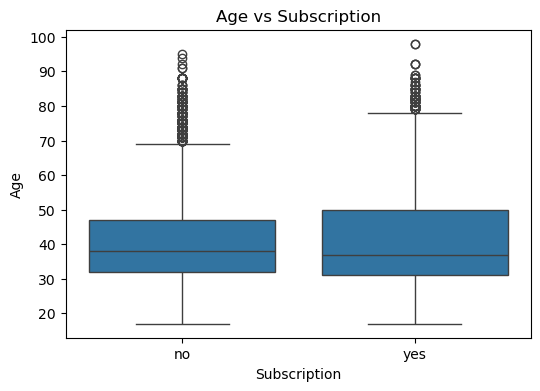

In [51]:
# Box Plot of Age vs Subscription
plt.figure(figsize=(6,4))
sns.boxplot(x='y', y='age', data=df)
plt.title('Age vs Subscription')
plt.xlabel('Subscription')
plt.ylabel('Age')
plt.show()

Helps understand how age varies between subscribed and non-subscribed groups.

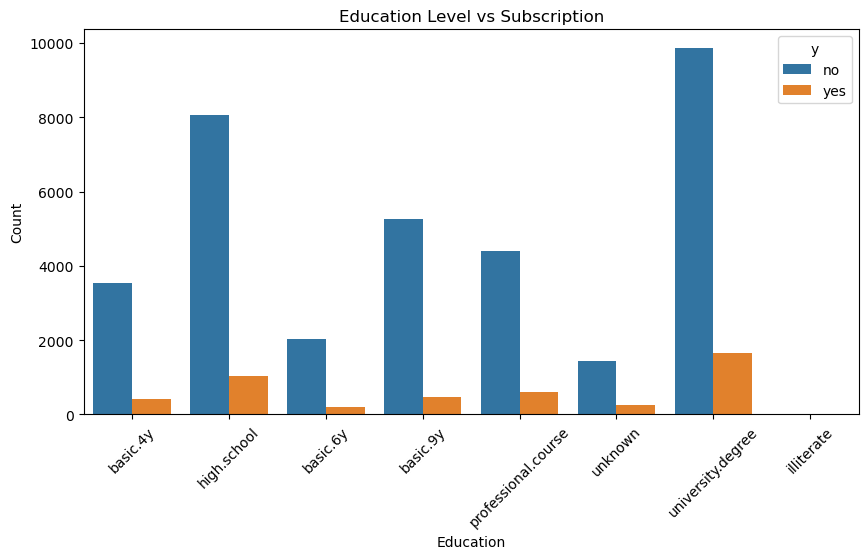

In [53]:
# Count Plot of Education vs Subscription
plt.figure(figsize=(10,5))
sns.countplot(x='education', hue='y', data=df)
plt.title('Education Level vs Subscription')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Shows how likely each education group is to subscribe.

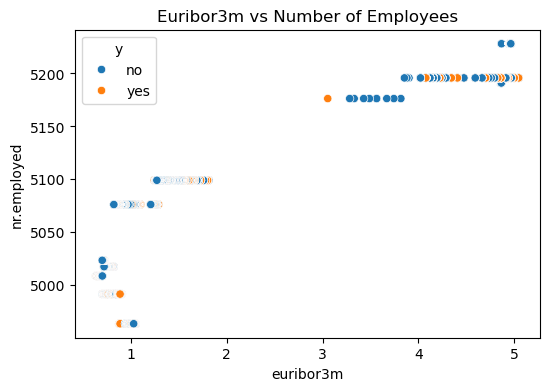

In [55]:
# Scatter Plot of euribor3m vs nr.employed
plt.figure(figsize=(6,4))
sns.scatterplot(x='euribor3m', y='nr.employed', hue='y', data=df)
plt.title('Euribor3m vs Number of Employees')
plt.show()

 Explores the relationship between economic indicators and customer behavior.

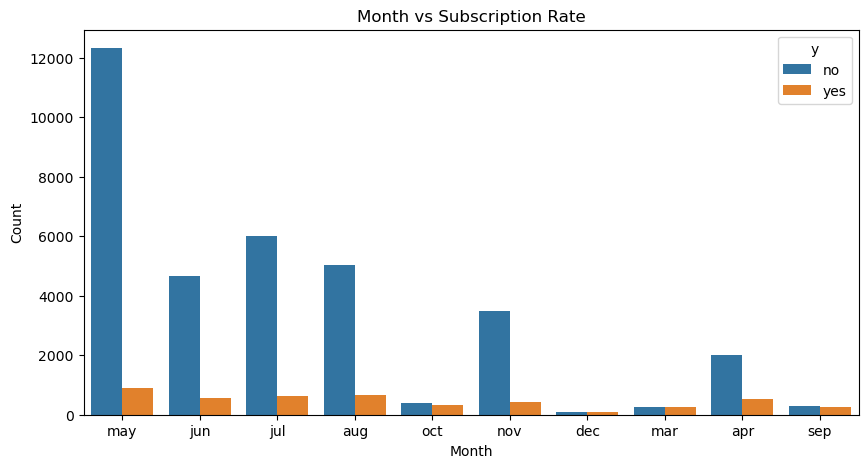

In [58]:
# Bar Plot of Month vs Subscription
plt.figure(figsize=(10,5))
sns.countplot(x='month', hue='y', data=df)
plt.title('Month vs Subscription Rate')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Analyzes which months had higher campaign success rates.

*Multivariate Analysis*

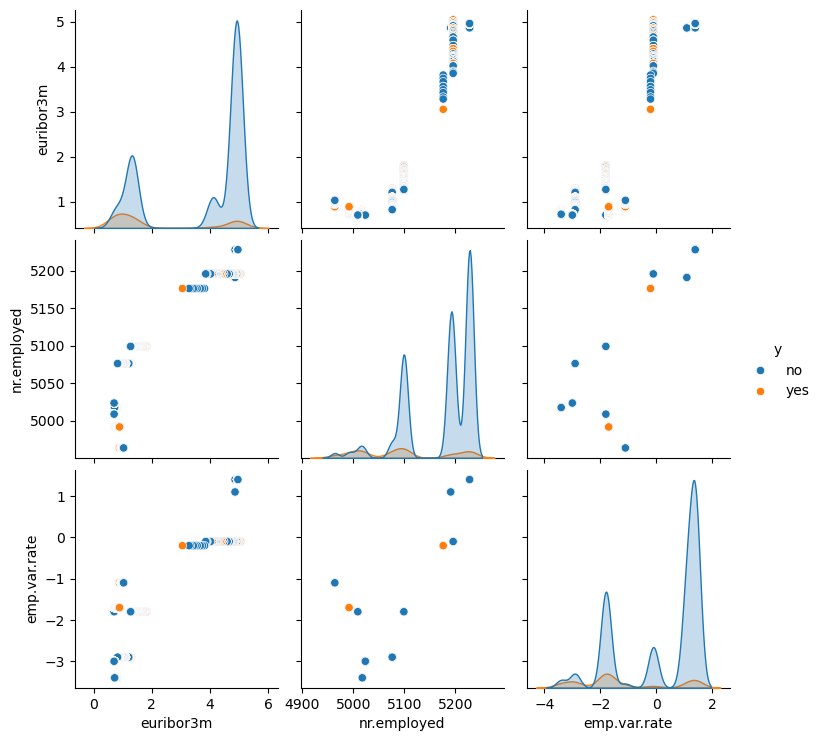

In [62]:
# Pairplot of Top Features
top_features = ['euribor3m', 'nr.employed', 'emp.var.rate', 'contact', 'poutcome', 'y']
sns.pairplot(df[top_features], hue='y')
plt.show()

Shows pairwise scatter plots and distributions. Color-coded by subscription—helps spot clusters and patterns.

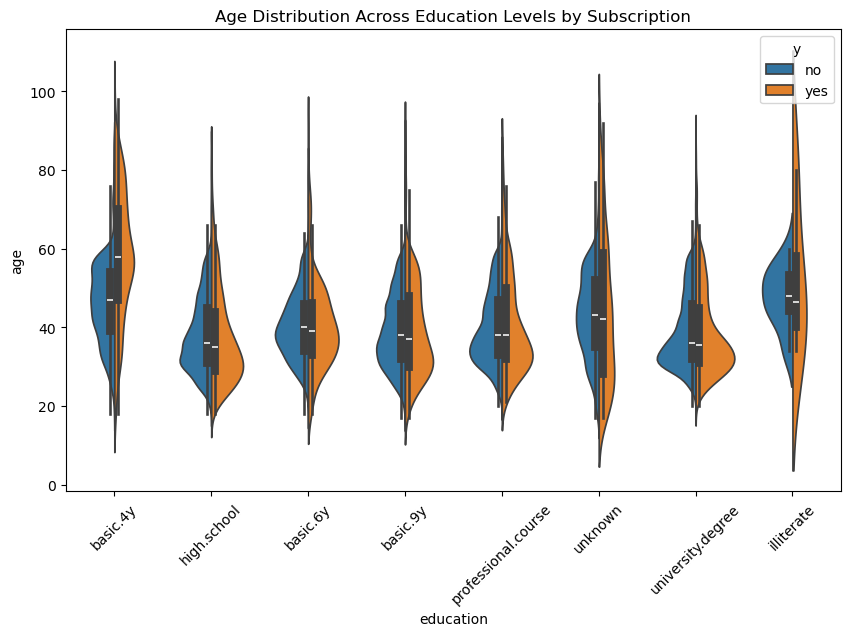

In [67]:
# Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='education', y='age', hue='y', data=df, split=True)
plt.title("Age Distribution Across Education Levels by Subscription")
plt.xticks(rotation=45)
plt.show()

Displays the distribution of age across different education levels, comparing those who subscribed (y = yes) and not.

**VII.Handle outliers**

*Checking The Skewness*

In [74]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numeric_cols].skew()
print("Skewness of numeric features:\n", skewness)

Skewness of numeric features:
 age               0.772868
campaign          4.685223
pdays            -4.788404
previous          3.756805
emp.var.rate     -0.700052
cons.price.idx   -0.230688
cons.conf.idx     0.312625
euribor3m        -0.680533
nr.employed      -1.020569
dtype: float64


*Capping Method*

In [78]:
# Create a copy
df_capped = df.copy()

# Define the capping function
def cap_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

# List of numeric columns to cap
numeric_cols = ['age', 'campaign', 'pdays', 'previous', 'nr.employed']

# Apply capping on the copy
for col in numeric_cols:
    df_capped = cap_outliers_iqr(df_capped, col)

Removing the outliers from 'age', 'campaign', 'pdays', 'previous', 'nr.employed' using capping method.

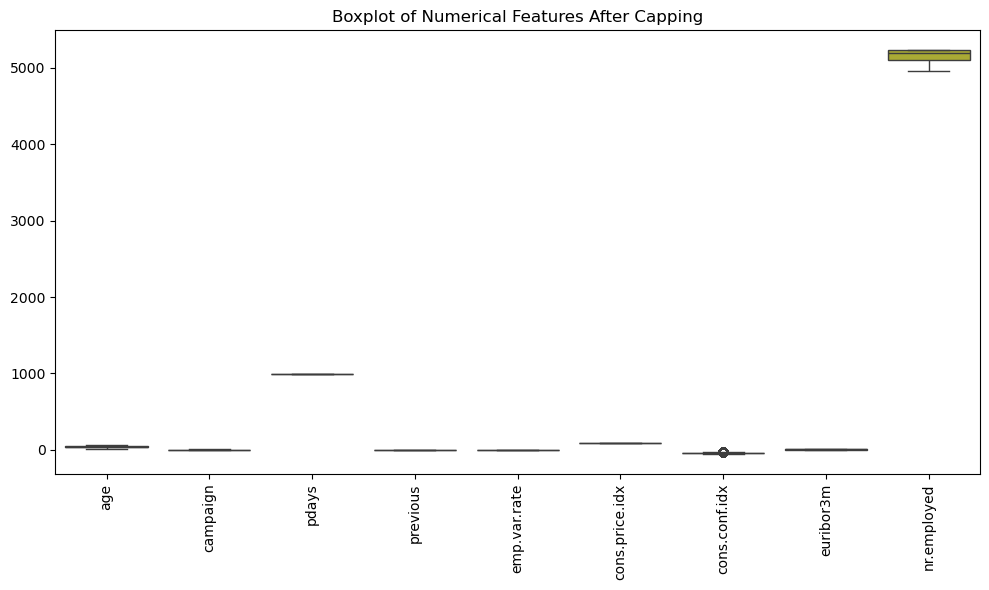

In [85]:
# Visualization of outliers after removing outliers of different features using boxplot
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_capped[numerical_cols])
plt.xticks(rotation=90)
plt.title('Boxplot of Numerical Features After Capping')
plt.tight_layout()
plt.show()

Here we can see there are still some outliers present after removing the outliers in some features.

*Checking The Skewness After Outlier Removal Process*

In [90]:
numeric_cols = df_capped.select_dtypes(include=['int64', 'float64']).columns
skewness = df_capped[numeric_cols].skew()
print("Skewness of numeric features after applying capping method:\n", skewness)

Skewness of numeric features after applying capping method:
 age               0.555512
campaign          1.165310
pdays             0.000000
previous          0.000000
emp.var.rate     -0.700052
cons.price.idx   -0.230688
cons.conf.idx     0.312625
euribor3m        -0.680533
nr.employed      -1.020569
dtype: float64


After Capping method some ouliers are still present.

*Log Transformation of Skewed Numerical Features*

In [93]:
df_log_transformed = df_capped.copy()
numerical_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in numerical_cols:
    skew_val = df_log_transformed[col].skew()
    if skew_val > 1 or skew_val < -1:
        df_log_transformed[col] = np.log1p(df_log_transformed[col])

print("Skewness after log transformation:")
print(df_log_transformed[numerical_cols].skew())

Skewness after log transformation:
age               0.555512
campaign          0.632746
pdays             0.000000
previous          0.000000
emp.var.rate     -0.700052
cons.price.idx   -0.230688
cons.conf.idx     0.312625
euribor3m        -0.680533
nr.employed      -1.039884
dtype: float64


In [94]:
df_log_transformed.shape

(39191, 19)

*Replacing 'unknown' with Mode*

In [96]:
df_new = df_log_transformed.copy()

# Replace 'unknown' in categorical columns with the mode
for col in df_new.select_dtypes(include='object').columns:
    if 'unknown' in df_new[col].unique():
        mode_value = df_new[col].mode()[0]
        df_new[col] = df_new[col].replace('unknown', mode_value)

print("Replaced 'unknown' values with mode")

Replaced 'unknown' values with mode


**VIII.Checking the data imbalance**

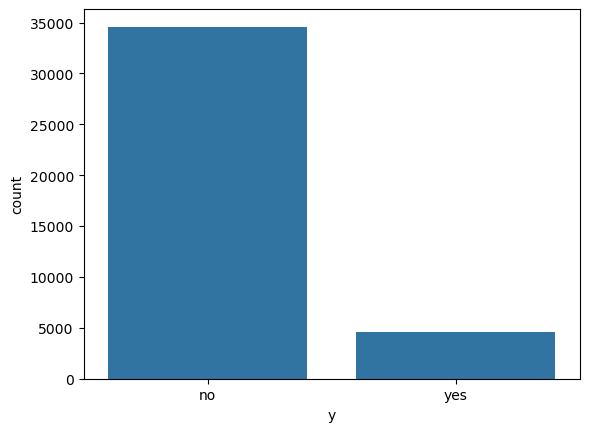

In [98]:
# Checking the data imbalance
sns.countplot(x='y', data= df_new)
plt.show()

**IX.Encoding**

In [100]:
df_label_encoded = df_new.copy()

label_encoders = {}
for col in df_label_encoded.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])
    label_encoders[col] = le 
    
print("Label encoding complete. Shape after encoding:", df_label_encoded.shape)

Label encoding complete. Shape after encoding: (39191, 19)


Label encoding was used to convert categorical columns like job, marital, education, etc., into numeric values so they can be used in machine learning models. Each unique category in a column was replaced with a unique integer. This method is suitable for our dataset because we are using tree-based models like Random Forest, XGBoost, Light GBM, Gradient Boosting and Decision Tree, which can handle label-encoded data without being misled by the numeric order.

In [102]:
df_label_encoded.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')

**X.Correlation Matrix**

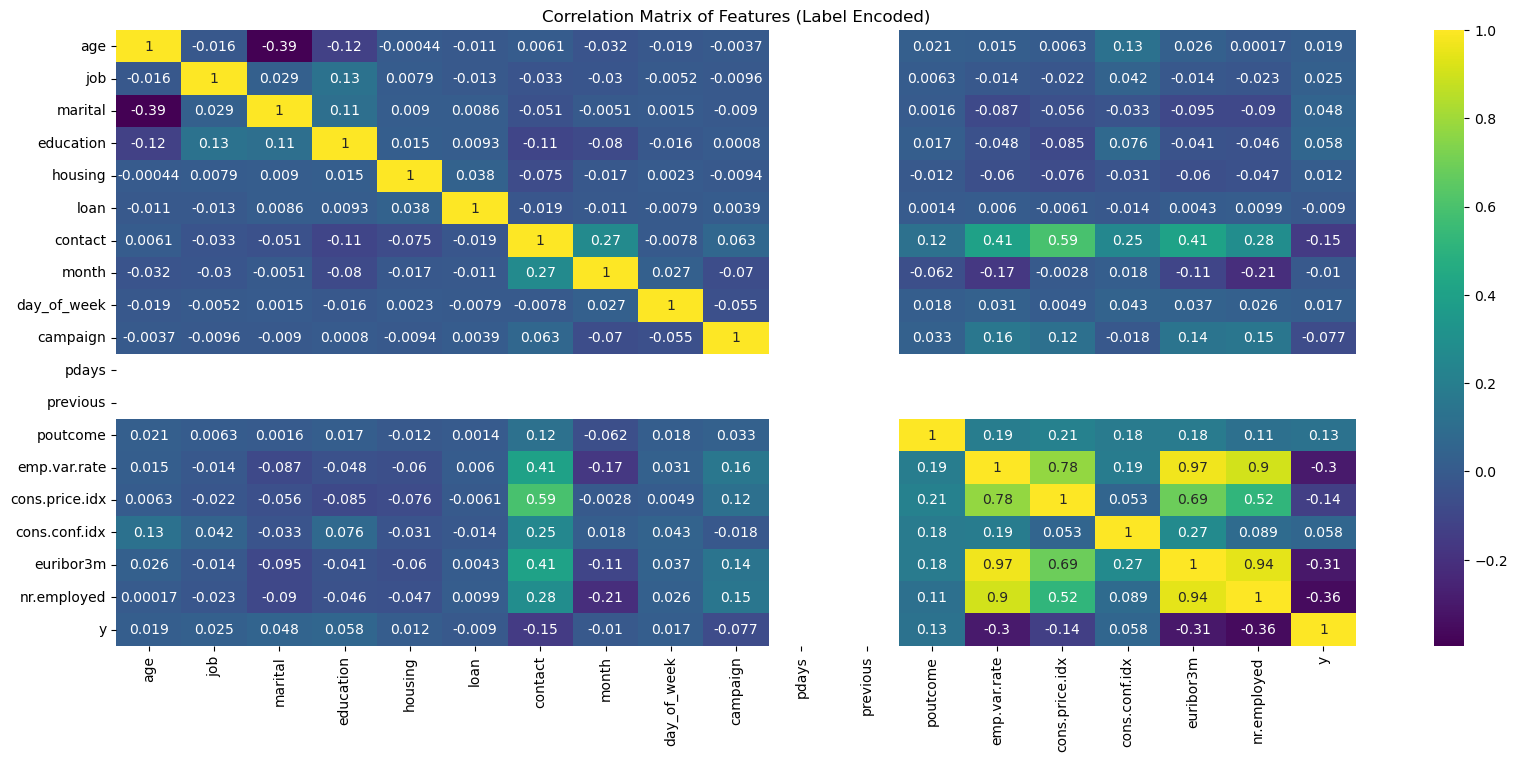

In [104]:
# Correlation Matrix
plt.figure(figsize=(20, 8))
sns.heatmap(df_label_encoded.corr(), annot=True, cmap='viridis')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Features (Label Encoded)')
plt.show()

Key Insights from Correlation Matrix:

    Most features have low correlation with the target variable y.

    emp.var.rate and nr.employed show the strongest negative correlation with y.
    
    Economic indicators like cons.price.idx and euribor3m are mildly negatively correlated with y.
    
    Features such as job, marital, and education show very low correlation, which is expected with label encoding.

*Correlation with target variable 'y'*

In [107]:
print(df_label_encoded.corr()['y'].sort_values(ascending=False))

y                 1.000000
poutcome          0.133006
education         0.058473
cons.conf.idx     0.057831
marital           0.047526
job               0.025410
age               0.018788
day_of_week       0.016967
housing           0.011594
loan             -0.009035
month            -0.010132
campaign         -0.077474
cons.price.idx   -0.136803
contact          -0.152162
emp.var.rate     -0.297782
euribor3m        -0.307617
nr.employed      -0.355001
pdays                  NaN
previous               NaN
Name: y, dtype: float64


**XI.Splitting Data For Train-Test Sets**

In [109]:
# Define features (X) and target (y)
X = df_label_encoded.drop(columns=['y'])
y = df_label_encoded['y'] 

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31352, 18) (7839, 18) (31352,) (7839,)


In [110]:
X_train

age  job  marital  education  housing  loan  contact  month  \
33919  33.0    0        1          3        0     0        0      6   
7870   47.0    2        1          6        0     1        1      4   
8792   46.0    0        1          6        0     0        1      4   
5244   32.0    1        1          2        1     0        1      6   
23197  47.0    0        0          6        0     1        0      1   
...     ...  ...      ...        ...      ...   ...      ...    ...   
6543   44.0    1        0          2        1     0        1      6   
11680  34.0    4        1          6        1     0        1      4   
40151  23.0    1        2          2        1     0        0      3   
891    39.0    1        1          1        0     0        1      6   
16593  39.0    0        1          1        0     0        0      3   

       day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
33919            4  0.693147  999.0       0.0         1          -1.8   
7870             1  0.693147  999.0       0.0         1           1.4   
8792             2  0.693147  999.0       0.0         1           1.4   
5244             0  1.386294  999.0       0.0         1           1.1   
23197            3  1.945910  999.0       0.0         1           1.4   
...            ...       ...    ...       ...       ...           ...   
6543             4  0.693147  999.0       0.0         1           1.1   
11680            0  1.386294  999.0       0.0         1           1.4   
40151            2  1.791759  999.0       0.0         0          -1.7   
891              4  0.693147  999.0       0.0         1           1.1   
16593            4  1.098612  999.0       0.0         1           1.4   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
33919          92.893          -46.2      1.281     8.537015  
7870           94.465          -41.8      4.865     8.561994  
8792           94.465          -41.8      4.866     8.561994  
5244           93.994          -36.4      4.857     8.554874  
23197          93.444          -36.1      4.965     8.561994  
...               ...            ...        ...          ...  
6543           93.994          -36.4      4.857     8.554874  
11680          94.465          -41.8      4.959     8.561994  
40151          94.215          -40.3      0.846     8.515712  
891            93.994          -36.4      4.856     8.554874  
16593          93.918          -42.7      4.963     8.561994  

[31352 rows x 18 columns]

In [111]:
X_test

age  job  marital  education  housing  loan  contact  month  \
26256  31.0    7        1          3        1     0        0      7   
31894  35.0    4        1          6        0     0        0      6   
15378  29.0    4        2          2        0     1        0      3   
27075  30.0    1        1          2        1     0        0      7   
25394  39.0   10        1          2        1     0        0      7   
...     ...  ...      ...        ...      ...   ...      ...    ...   
444    34.0    0        1          2        0     0        1      6   
1385   56.0    1        1          0        0     0        1      6   
21072  47.0    1        1          6        0     1        0      1   
37705  25.0    0        2          6        1     0        1      1   
19051  34.0    0        1          6        0     0        0      1   

       day_of_week  campaign  pdays  previous  poutcome  emp.var.rate  \
26256            2  0.693147  999.0       0.0         1          -0.1   
31894            2  0.693147  999.0       0.0         0          -1.8   
15378            0  0.693147  999.0       0.0         1           1.4   
27075            0  1.098612  999.0       0.0         0          -0.1   
25394            3  0.693147  999.0       0.0         1          -0.1   
...            ...       ...    ...       ...       ...           ...   
444              3  0.693147  999.0       0.0         1           1.1   
1385             2  1.098612  999.0       0.0         1           1.1   
21072            2  1.386294  999.0       0.0         1           1.4   
37705            2  0.693147  999.0       0.0         1          -2.9   
19051            3  0.693147  999.0       0.0         1           1.4   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
26256          93.200          -42.0      4.076     8.555798  
31894          92.893          -46.2      1.327     8.537015  
15378          93.918          -42.7      4.957     8.561994  
27075          93.200          -42.0      4.021     8.555798  
25394          93.200          -42.0      4.153     8.555798  
...               ...            ...        ...          ...  
444            93.994          -36.4      4.857     8.554874  
1385           93.994          -36.4      4.855     8.554874  
21072          93.444          -36.1      4.964     8.561994  
37705          92.201          -31.4      0.851     8.532515  
19051          93.444          -36.1      4.968     8.561994  

[7839 rows x 18 columns]

In [112]:
y_train

33919    0
7870     0
8792     0
5244     0
23197    0
        ..
6543     0
11680    0
40151    1
891      0
16593    0
Name: y, Length: 31352, dtype: int32

In [113]:
y_test

26256    0
31894    0
15378    1
27075    0
25394    0
        ..
444      0
1385     0
21072    0
37705    0
19051    0
Name: y, Length: 7839, dtype: int32

**XII.Balancing Class Distribution Using SMOTE**

In [115]:
print("Original Class Distribution:", y_train.value_counts())

# Apply SMOTE to balance the class distribution 
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Resampled Class Distribution:", pd.Series(y_train).value_counts())

Original Class Distribution: y
0    27673
1     3679
Name: count, dtype: int64
Resampled Class Distribution: y
0    27673
1    27673
Name: count, dtype: int64


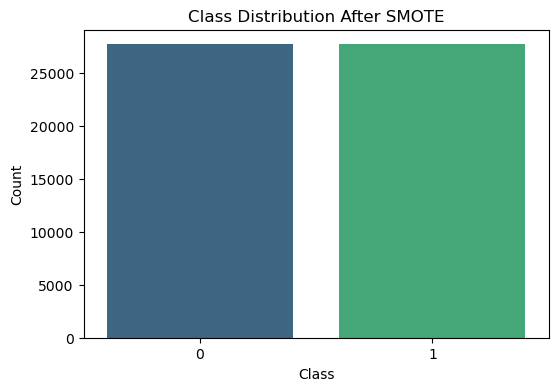

In [117]:
# Count Plot for Resampled Data
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train, palette="viridis")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution After SMOTE")
plt.show()

In [118]:
X_train.shape

(55346, 18)

In [119]:
y_train.shape

(55346,)

**XIII.Feature Selection Using RFE With Random Forest Classifier**

In [121]:
# Separate features and target variable
X = df_label_encoded.drop(columns=['y'])  # Features (drop target variable)
y = df_label_encoded['y']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a RandomForestClassifier model (can be any estimator)
model = RandomForestClassifier(random_state=42)

# Initialize RFE with the model and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=10)  # Select the top 10 features

# Fit RFE
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Optionally, evaluate the model with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the model with selected features
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the model (e.g., using accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with Selected Features: {accuracy:.4f}")

Selected Features: Index(['age', 'job', 'marital', 'education', 'day_of_week', 'campaign',
       'poutcome', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Model Accuracy with Selected Features: 0.8793


In [122]:
X_train_selected

age  job  marital  education  day_of_week  campaign  poutcome  \
33919  33.0    0        1          3            4  0.693147         1   
7870   47.0    2        1          6            1  0.693147         1   
8792   46.0    0        1          6            2  0.693147         1   
5244   32.0    1        1          2            0  1.386294         1   
23197  47.0    0        0          6            3  1.945910         1   
...     ...  ...      ...        ...          ...       ...       ...   
6543   44.0    1        0          2            4  0.693147         1   
11680  34.0    4        1          6            0  1.386294         1   
40151  23.0    1        2          2            2  1.791759         0   
891    39.0    1        1          1            4  0.693147         1   
16593  39.0    0        1          1            4  1.098612         1   

       cons.conf.idx  euribor3m  nr.employed  
33919          -46.2      1.281     8.537015  
7870           -41.8      4.865     8.561994  
8792           -41.8      4.866     8.561994  
5244           -36.4      4.857     8.554874  
23197          -36.1      4.965     8.561994  
...              ...        ...          ...  
6543           -36.4      4.857     8.554874  
11680          -41.8      4.959     8.561994  
40151          -40.3      0.846     8.515712  
891            -36.4      4.856     8.554874  
16593          -42.7      4.963     8.561994  

[31352 rows x 10 columns]

In [123]:
X_train_selected.shape

(31352, 10)

*Evaluating Model Performance After Feature Selection*

In [125]:
model.fit(X_train_selected, y_train)
accuracy = model.score(X_test_selected, y_test)
print("Model Accuracy after feature selection:", accuracy)

Model Accuracy after feature selection: 0.8793213420079091


# **MODEL TRAINING AND EVALUATION**

**I.Random Forest Classifier**

In [129]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Precision:", precision_score(y_test, y_pred_rfc))
print("Recall:", recall_score(y_test, y_pred_rfc))
print("F1 Score:", f1_score(y_test, y_pred_rfc))

Random Forest Classifier
Accuracy: 0.8830207934685547
Precision: 0.5009633911368016
Recall: 0.28322440087145967
F1 Score: 0.3618649965205289


**II.XGBoost Classifier**

In [131]:
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

XGBoost Classifier
Accuracy: 0.8891440234723816
Precision: 0.5513626834381551
Recall: 0.28649237472766886
F1 Score: 0.37706093189964157


**III.LightGBM Classifier**

In [134]:
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)

print("LightGBM Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("Precision:", precision_score(y_test, y_pred_lgb))
print("Recall:", recall_score(y_test, y_pred_lgb))
print("F1 Score:", f1_score(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 3679, number of negative: 27673
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 31352, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117345 -> initscore=-2.017816
[LightGBM] [Info] Start training from score -2.017816
LightGBM Classifier
Accuracy: 0.8955223880597015
Precision: 0.6204379562043796
Recall: 0.2777777777777778
F1 Score: 0.3837471783295711


**IV.Decision Tree Classifier**

In [136]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))

Decision Tree Classifier
Accuracy: 0.8253603775991836
Precision: 0.28462273161413565
Recall: 0.32461873638344224
F1 Score: 0.30330788804071246


**V.Gradient Boosting Classifier**

In [139]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

print("Gradient Boosting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_gbc))
print("Precision:", precision_score(y_test, y_pred_gbc))
print("Recall:", recall_score(y_test, y_pred_gbc))
print("F1 Score:", f1_score(y_test, y_pred_gbc))

Gradient Boosting Classifier
Accuracy: 0.8942467151422375
Precision: 0.6199460916442049
Recall: 0.25054466230936817
F1 Score: 0.35686578743211794


Best Model : LightGBM Classifier

    The LightGBM Classifier is the best model for this task, achieving an accuracy of 89.55%, precision of 62.04%, recall of 27.78%, and an F1 score of 38.37%. It performs well because it's fast, handles large datasets efficiently, and provides a good balance between accuracy and precision.
    
    Gradient Boosting Classifier: Close second, with slightly lower recall but good balance of metrics.

**VI.Cross-Validation Of Multiple Models**

In [143]:
# List of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42))
]

# Perform cross-validation for each model
for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} cross-validation accuracy: {np.mean(cv_scores):.4f}")

Random Forest cross-validation accuracy: 0.8891
XGBoost cross-validation accuracy: 0.8926
Decision Tree cross-validation accuracy: 0.8281
Gradient Boosting cross-validation accuracy: 0.8976
[LightGBM] [Info] Number of positive: 2943, number of negative: 22138
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005499 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 380
[LightGBM] [Info] Number of data points in the train set: 25081, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.117340 -> initscore=-2.017866
[LightGBM] [Info] Start training from score -2.017866
[LightGBM] [Info] Number of positive: 2943, number of negative: 22138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Tota

Gradient Boosting Classifier and LightGBM Classifier perform the best, both having the highest accuracy score of 0.8976.
Considering both the cross-validation results and the evaluation metrics results (accuracy, precision, recall, and F1 score), 
the best model is the LightGBM Classifier.

**VII.ROC Curves With AUC For Multiple Models**

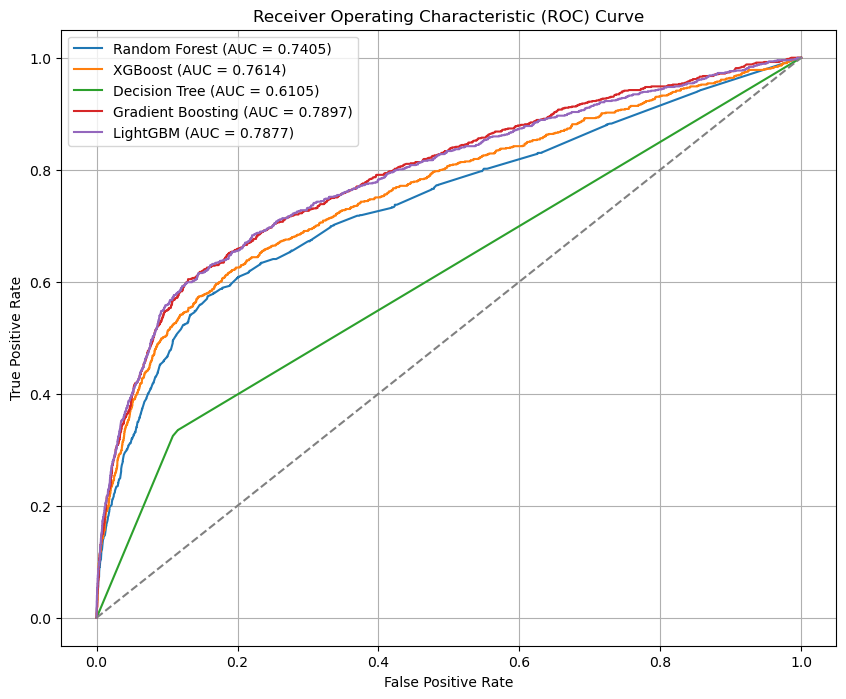

In [146]:
# Get predicted probabilities
y_probs = {
    "Random Forest": rfc.predict_proba(X_test)[:, 1],
    "XGBoost": xgb.predict_proba(X_test)[:, 1],
    "Decision Tree": dt.predict_proba(X_test)[:, 1],
    "Gradient Boosting": gbc.predict_proba(X_test)[:, 1],
    "LightGBM": lgb.predict_proba(X_test)[:, 1]
}

plt.figure(figsize=(10, 8))

for name, y_prob in y_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

Both models show strong performance, with LightGBM having a slight edge in most metrics (Accuracy, Precision, Recall, F1 Score). 
However, Gradient Boosting marginally outperforms LightGBM in AUC. 

Based on the overall comparison, LightGBM is considered as the better choice in this case.

# **Model Optimization**

**I.Hyperparameter Tuning For Gradient Boosting And LightGBM**

In [151]:
# Define parameter grids
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

param_grid_lgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'num_leaves': [15, 31],
}

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_gb.fit(X_train, y_train)

# LightGBM 
lgb = LGBMClassifier(random_state=42, verbosity=-1)  # verbosity=-1 suppresses LightGBM logs
grid_lgb = GridSearchCV(lgb, param_grid_lgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_lgb.fit(X_train, y_train)

print("\nGradient Boosting")
print("Best parameters:", grid_gb.best_params_)
print("Best cross-validation score:", round(grid_gb.best_score_, 4))

print("\nLightGBM")
print("Best parameters:", grid_lgb.best_params_)
print("Best cross-validation score:", round(grid_lgb.best_score_, 4))


Gradient Boosting
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best cross-validation score: 0.8976

LightGBM
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 15}
Best cross-validation score: 0.8979


**II.Evaluating Model Performance After Hyperparameter Tuning For Gradient Boosting And LightGBM**

In [154]:
# Make predictions
y_pred_gb = grid_gb.best_estimator_.predict(X_test)
y_pred_lgb = grid_lgb.best_estimator_.predict(X_test)

# Get predicted probabilities for AUC calculation
y_prob_gb = grid_gb.best_estimator_.predict_proba(X_test)[:, 1]
y_prob_lgb = grid_lgb.best_estimator_.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
auc_gb = roc_auc_score(y_test, y_prob_gb)

# Calculate evaluation metrics for LightGBM
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)
auc_lgb = roc_auc_score(y_test, y_prob_lgb)

print("\nGradient Boosting")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
print(f"AUC: {auc_gb:.4f}")

print("\nLightGBM")
print(f"Accuracy: {accuracy_lgb:.4f}")
print(f"Precision: {precision_lgb:.4f}")
print(f"Recall: {recall_lgb:.4f}")
print(f"F1 Score: {f1_lgb:.4f}")
print(f"AUC: {auc_lgb:.4f}")


Gradient Boosting
Accuracy: 0.8949
Precision: 0.6291
Recall: 0.2495
F1 Score: 0.3573
AUC: 0.7878

LightGBM
Accuracy: 0.8946
Precision: 0.6230
Recall: 0.2538
F1 Score: 0.3607
AUC: 0.7934


LightGBM: Higher AUC and F1 score, better recall, making it more reliable in capturing positive cases and distinguishing between the classes.

Gradient Boosting: Higher precision, slightly better in minimizing false positives.

In conclusion, LightGBM is the better model when considering AUC and overall model performance, particularly in situations where recall and 
F1 balance are critical.

# **Pipeline**

**I.Building And Saving The Pipeline**

In [158]:
categorical_cols = X.select_dtypes(include="object").columns.tolist()

# ColumnTransformer for Label Encoding
preprocessor = ColumnTransformer([
    ("label", LabelEncoder(), categorical_cols)
], remainder="passthrough")

# Pipeline
pipeline = Pipeline([
    ("encoding", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("feature_selection", RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=10)),
    ("model", LGBMClassifier(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit pipeline
pipeline.fit(X_train, y_train)

# Save entire pipeline
joblib.dump(pipeline, "term_deposit.pkl")

['term_deposit.pkl']

**II.Cross-Validation Of Pipeline**

In [160]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation accuracy scores: [0.89379684 0.89634827 0.89824561 0.89409888 0.89441786]
Mean CV accuracy: 0.8953814945737666


**III.Evaluating Train And Test Accuracy For Pipeline Model**

In [162]:
# Predict on train and test data
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Train Accuracy: 0.9061303904057157
Test Accuracy: 0.8947569843092231


**IV.Making Predictions On New Data With The Trained Pipeline**

In [164]:
def predict_on_new_data(new_data_path):
    model = joblib.load("term_deposit.pkl")
    new_data = pd.read_csv(new_data_path)
    categorical_cols = new_data.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        le = LabelEncoder()
        new_data[col] = le.fit_transform(new_data[col])
    
    predictions = model.predict(new_data)
    return predictions

predictions = predict_on_new_data("unseen_data.csv")
print(predictions)

[0 0 0 ... 0 0 0]


**V.Loading And Previewing New Data**

In [230]:
new_data = pd.read_csv("unseen_data.csv")
new_data.head()

age            job   marital            education default housing loan  \
0   26    blue-collar    single  professional.course      no     yes   no   
1   35  self-employed  divorced             basic.9y      no      no  yes   
2   34    blue-collar   married             basic.6y      no      no   no   
3   30  self-employed    single    university.degree      no      no   no   
4   19        student    single             basic.4y      no      no  yes   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   jun         thu  ...         2    999         0  nonexistent   
1  telephone   may         mon  ...         3    999         0  nonexistent   
2  telephone   may         wed  ...         8    999         0  nonexistent   
3  telephone   nov         fri  ...         2    999         0  nonexistent   
4   cellular   apr         wed  ...         2    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
0         -2.9          92.963          -40.8      1.260       5076.2   no  
1          1.1          93.994          -36.4      4.858       5191.0   no  
2          1.1          93.994          -36.4      4.858       5191.0   no  
3         -0.1          93.200          -42.0      4.021       5195.8   no  
4         -1.8          93.075          -47.1      1.405       5099.1  yes  

[5 rows x 21 columns]

In [232]:
new_data["y"]

0         no
1         no
2         no
3         no
4        yes
        ... 
11995     no
11996     no
11997     no
11998    yes
11999     no
Name: y, Length: 12000, dtype: object